#### Loading libraries 

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#https://www.datacamp.com/community/tutorials/wordcloud-python


#### Loading dataset

In [ ]:
# Loading dataset
def load_data():
    data = pd.read_csv('C:/Users/shivk/Desktop/DSC478/Roman Urdu DataSet.csv', header=None)
    return data
    #sample_data/Roman Urdu DataSet.csv

In [ ]:
roman_urdu_df = load_data()
roman_urdu_df.head()


,0,1,2
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


#### Data cleaning

Dropping empty column

In [ ]:
roman_urdu_df = roman_urdu_df.drop([2], axis=1)

In [ ]:
roman_urdu_df

,0,1
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
...,...,...
20224,Hamari jese awam teli laga k mazay leti,Negative
20225,Kaash hum b parhay likhay hotayKabhi likhtay g...,Negative
20226,Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,Negative
20227,aanti toh gussa e kr gai hain,Negative


Assigning columns name:

In [ ]:
roman_urdu_df.columns = ['Sentence', 'Response']

Checking for Null values:

In [ ]:
roman_urdu_df.isnull().sum()

Sentence    1
Response    0
dtype: int64

Dropping all null values:

In [ ]:
roman_urdu_df.dropna(inplace = True)

In [ ]:
roman_urdu_df.isnull().sum()

Sentence    0
Response    0
dtype: int64

counting response on each sentence.

In [ ]:
roman_urdu_df['Response'].value_counts()

Neutral     8928
Positive    6013
Negative    5286
Neative        1
Name: Response, dtype: int64

In [ ]:
# we can see there is one neative response
# digging inside it
roman_urdu_df[roman_urdu_df['Response'] == 'Neative']

,Sentence,Response
13277,product achi hai but wrong waist size send kar...,Neative


By looking at the sentence it look like it is negative response or we can say typo mistake

Fixing wrong class assignment.

In [ ]:
roman_urdu_df.loc[roman_urdu_df['Response']=='Neative', 'Response'] = 'Negative'

In [ ]:
roman_urdu_df['Response'].value_counts()

Neutral     8928
Positive    6013
Negative    5287
Name: Response, dtype: int64

In [ ]:
positive = df[df['Response'] == 'Positive'].shape[0]
Negative = df[df['Response'] == 'Negative'].shape[0]
Neutral = df[df['Response'] == 'Neutral'].shape[0]

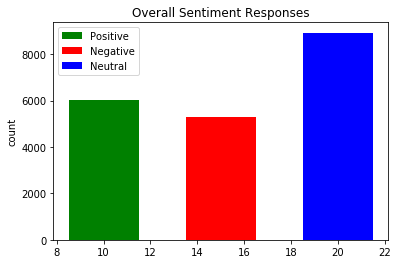

In [ ]:
# bar plot of the 3 classes
plt.bar(10,positive,3, label="Positive",color=['green'])
plt.bar(15,Negative,3, label="Negative",color=['red'])
plt.bar(20,Neutral,3, label="Neutral",color=['blue'])
plt.legend()
plt.ylabel('count')
plt.title('Overall Sentiment Responses')
plt.show()

##### Overall Data Statistics 

##### Creating dataframe of Sentence and Response Types


In [ ]:
roman_urdu_df.dtypes

Sentence    object
Response    object
dtype: object

In [ ]:
print('Dataset size:',roman_urdu_df.shape)
print('Columns are:',roman_urdu_df.columns)

Dataset size: (20228, 2)
Columns are: Index(['Sentence', 'Response'], dtype='object')


In [ ]:
df  = pd.DataFrame(roman_urdu_df[['Sentence', 'Response']])
df.head(90)

,Sentence,Response
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
...,...,...
85,Intehai masroof aur mashoor fankara hone ke ba...,Positive
86,Bushra apni family se bohat ziyada attached ha...,Positive
87,Career : Bushra Ansari sirf 9 saal ki umer mei...,Positive
88,To Farooq Qiaser ne inhe apne show Kalliyan k...,Positive


#### Normalizating Techniques

In [ ]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Removing Punutaions:

This funcation below removes all the punctuation shown above 

In [ ]:
def remove_punct(text):
    text  = "".join([char for [char] in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [ ]:
# removing all the punctuation
df['Sentence_Removal'] = df['Sentence'].apply(lambda x: remove_punct(str(x))) 

In [ ]:
df.head(5) #testing to view transformed data

,Sentence,Response,Sentence_Removal
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...
1,sahi bt h,Positive,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai
3,Wah je wah,Positive,Wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai


Lowercase transformation:

This funcation below transforms all the values to lower case 

In [ ]:
def convert_to_lower_case(text):
    text  = "".join([char.lower() for [char] in text if char not in string.punctuation])
    return text

In [ ]:
# converting all sentences to lower case calling above function
df['Lower_Case'] = df['Sentence_Removal'].apply(lambda x: convert_to_lower_case(str(x)))

In [ ]:
df.head(5) #testing lower case of alphabet

,Sentence,Response,Sentence_Removal,Lower_Case
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...
1,sahi bt h,Positive,sahi bt h,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai
3,Wah je wah,Positive,Wah je wah,wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai


In [ ]:
new = []
new = df['Lower_Case'].str

In [ ]:
df['Lower_Case'][1]

'sahi bt h'

Stop words removing:

Stop words were were taken intaliay from the world wide wide however while performing clustering I saw additional stop words that were further revisted and removed.
The link for the stopWords:https://github.com/haseebelahi/roman-urdu-stopwords/commit/d91938ddf45aebdceefa03901d50cf04d193d7e2#diff-035e0ea95edf76cb6f050e73d5631b9f5858334d500cda0da554746430368498

In [ ]:
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 
           'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch',
           'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to','is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala',
           'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai',
           'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi',
           'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil',
           'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']

In [ ]:
# Pinki code for all stop word and dictionary
# creating a new sentence after removing stop words from old sentence 
# creating dictionary of stopword
dictStopWords = {} # global variable
# Creating a new sentence after removing stop wrods from old sentence.
def removeStopWordss(text):
    text = re.sub('[^a-zA-Z]',' ',str(text))
    text = text.lower()
    wordList =str(text).split()
    for word in wordList:
        if word in stopwords:
            wordList.remove(word)
            if word not in dictStopWords:
                dictStopWords[word]= 1
            else:
                dictStopWords[word] = dictStopWords[word] + 1
    newSentence = " ".join(wordList)
    return (newSentence)

In [ ]:
# Remove all the stop words from each sentences
df['Sen_Out_StopWord'] = df['Lower_Case'].apply(lambda x: removeStopWordss(x))
df.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi kay bus bat nhi lakin ki hal ...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt h
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah je wah
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat


In [ ]:
## checking for most common stopwords from the dictionary
import collections
from collections import Counter
dictGraph = {}
d = Counter(dictStopWords) # creating a counter 
d.most_common(10) 
for k,v in d.most_common(10):
    dictGraph[k] = v
dictGraph

{'ki': 5578,
 'ko': 3471,
 'ka': 3466,
 'hai': 3296,
 'se': 3110,
 'aur': 2629,
 'ne': 1948,
 'hain': 1536,
 'ho': 1514,
 'bhi': 1341}

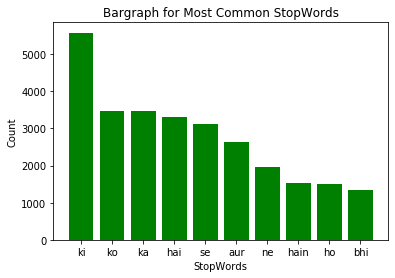

In [ ]:
#plotting a graph of 10 most common stopwords from dictionary
plt.bar(dictGraph.keys(), dictGraph.values(), align='center', color = 'green')
plt.title('Bargraph for Most Common StopWords')
plt.xlabel('StopWords')
plt.ylabel('Count')
plt.show()

In [ ]:
def hashing(word):
    word = re.sub(r'ain$', r'ein', word)
    word = re.sub(r'ai', r'ae', word)
    word = re.sub(r'ay$', r'e', word)
    word = re.sub(r'ey$', r'e', word)
    word = re.sub(r'ie$', r'y', word)
    word = re.sub(r'^es', r'is', word)
    word = re.sub(r'a+', r'a', word)
    word = re.sub(r'j+', r'j', word)
    word = re.sub(r'd+', r'd', word)
    word = re.sub(r'u', r'o', word)
    word = re.sub(r'o+', r'o', word)
    word = re.sub(r'ee+', r'i', word)
    if not re.match(r'ar', word):
        word = re.sub(r'ar', r'r', word)
        word = re.sub(r'iy+', r'i', word)
        word = re.sub(r'ih+', r'eh', word)
        word = re.sub(r's+', r's', word)
    if re.search(r'[rst]y', 'word') and word[-1] != 'y':
        word = re.sub(r'y', r'i', word)
    if re.search(r'[bcdefghijklmnopqrtuvwxyz]i', word):
        word = re.sub(r'i$', r'y', word)
    if re.search(r'[acefghijlmnoqrstuvwxyz]h', word):
        word = re.sub(r'h', '', word)
        word = re.sub(r'k', r'q', word)
    return word

In [ ]:
df['stem'] = df['Sen_Out_StopWord'].apply(lambda x: hashing(x))
df.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord,stem
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi kay bus bat nhi lakin ki hal ...,sae qa er qisi qay bos bat ni laqin qi al qal ...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt h,sai bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt,bt
3,Wah je wah,Positive,Wah je wah,wah je wah,wah je wah,wa je wa
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat,are wa qaya bat


In [ ]:
df.Sentence_Removal

0        Sai kha ya her kisi kay bus ki bat nhi hai lak...
1                                                sahi bt h
2                                               Kya bt hai
3                                               Wah je wah
4                                     Are wha kaya bat hai
                               ...                        
20224             Hamari jese awam teli laga k mazay leti 
20225    Kaash hum b parhay likhay hotayKabhi likhtay g...
20226    Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...
20227                       aanti toh gussa e kr gai hain 
20228    mai b sirf shadi kanry ki waja say imran khan ...
Name: Sentence_Removal, Length: 20228, dtype: object

In [ ]:
df['Stem_On_Original'] = df['Lower_Case'].apply(lambda x: hashing(x))
df.head()

,Sentence,Response,Sentence_Removal,Lower_Case,Sen_Out_StopWord,stem,Stem_On_Original
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,Sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha ya her kisi kay bus ki bat nhi hai lak...,sai kha her kisi kay bus bat nhi lakin ki hal ...,sae qa er qisi qay bos bat ni laqin qi al qal ...,sae qa ya er qisi qay bos qi bat ni ae laqin m...
1,sahi bt h,Positive,sahi bt h,sahi bt h,sahi bt h,sai bt,sai bt
2,"Kya bt hai,",Positive,Kya bt hai,kya bt hai,bt,bt,kya bt hae
3,Wah je wah,Positive,Wah je wah,wah je wah,wah je wah,wa je wa,wa je wa
4,Are wha kaya bat hai,Positive,Are wha kaya bat hai,are wha kaya bat hai,are wha kaya bat,are wa qaya bat,are wa qaya bat ae


# Visualization


Count number of words for each sentence.

In [ ]:
df['len'] = df['Sentence'].str.rsplit().str.len()

Display average number of words per sentiment

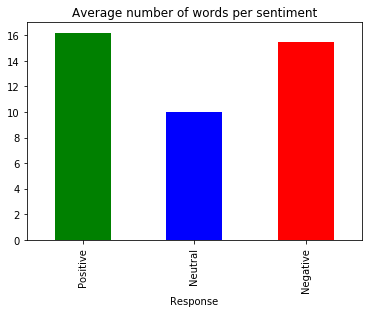

In [ ]:
df.groupby(['Response'], sort=False)['len'].mean().plot(kind='bar',title = "Average number of words per sentiment",  color=['g', 'b', 'r'])

Display maximum number of words per sentiment

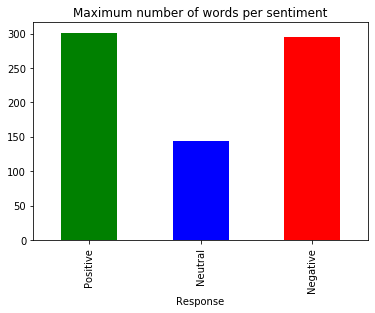

In [ ]:
df.groupby(['Response'], sort=False)['len'].max().plot(kind='bar',title = "Maximum number of words per sentiment",color=['g', 'b', 'r'])

Raw data viz , word cloud Rauf

### Statistics after cleaning


In [ ]:
stats = df.drop(labels=["Sentence", "Sentence_Removal"], axis=1)
stats.describe()

,len
count,20228.000000
mean,13.285149
std,13.447222
min,0.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,301.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy


In [ ]:
def generateWordCloudForClusters(n_clusters,clustermTerms):
    termListerOfSeprateCluster=[]
    for clusterno in range(n_clusters):
        for i in (clustermTerms):
            if(clusterno == i.get('cluster')):
                terms = i.get('terms')
                termListerOfSeprateCluster.append((terms))
        print(termListerOfSeprateCluster)
        wordcloud = WordCloud(width = 500, height = 500, background_color='black', random_state=10).generate(transformForWordCount(termListerOfSeprateCluster))
        plot_cloud(wordcloud)
        termListerOfSeprateCluster = []
    

In [ ]:
def transformForWordCount(terms):
    cloud = []
    for term in range(len(terms)):
        cloud.append(terms[term])
    return " ".join(cloud)

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");


### clustering for positive response 

In [ ]:
n_clusters = 5

In [ ]:
df

In [ ]:
positivedf = df[df['Response'] == 'Positive']
positivedf.head()

In [ ]:
# vectorization of the texts
vectorizer = TfidfVectorizer()



In [ ]:
def vectorFeatures(dataSet):
    matrixForm = vectorizer.fit_transform(dataSet['Sen_Out_StopWord'])
# used words (axis in our multi-dimensional space)
    words = vectorizer.get_feature_names()
    #print("words", words)
    return matrixForm,words

In [ ]:
def performKmeansClustering(n_clusters,max_iter,matrixForm):
    n_clusters=5
    max_iter = 500
    number_of_process=2 # seads are distributed
    modelKmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, verbose=1)
    modelKmeans.fit(matrixForm)
    return modelKmeans
    

In [ ]:
matrixForm,words = vectorFeatures(positivedf)

In [ ]:
modelKmeans = performKmeansClustering(5,500,matrixForm)


In [ ]:
labels = modelKmeans.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeans.cluster_centers_.argsort()[:, ::-1]

print("centers:", modelKmeans.cluster_centers_)
print("labels", labels)
print("intertia:", modelKmeans.inertia_)

In [ ]:
ordered_words

In [ ]:
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
words

In [ ]:
clusterDictionary={}
clustermTerms=[]
print("Top words per cluster:")
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

In [ ]:
generateWordCloudForClusters(5,clustermTerms)

#### Clustering for Negative

In [ ]:
negtivedf = df[df['Response'] == 'Negative']
negtivedf.head()

In [ ]:
matrixFormNeg,words = vectorFeatures(negtivedf)

In [ ]:
modelKmeansNeg = performKmeansClustering(5,500,matrixFormNeg)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=500, n_init=10)
    km = km.fit(matrixFormNeg)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
labelsNeg = modelKmeansNeg.labels_
# indices of preferible words in each cluster
ordered_words = modelKmeansNeg.cluster_centers_.argsort()[:, ::-1]

print("centers:", modelKmeansNeg.cluster_centers_)
print("labels", labelsNeg)
print("intertia:", modelKmeansNeg.inertia_)

In [ ]:
texts_per_cluster = numpy.zeros(n_clusters)
for i_cluster in range(n_clusters):
    for label in labels:
        if label==i_cluster:
            texts_per_cluster[i_cluster] +=1

In [ ]:
print("Top Negitive words per cluster:")
clustermTerms = []
clusterDictionary={}
for i_cluster in range(n_clusters):
    print("Cluster:", i_cluster, "texts:", int(texts_per_cluster[i_cluster])),
    for term in ordered_words[i_cluster, :10]:
        clusterDictionary = {"cluster" : i_cluster,"terms" : words[term]}
        clustermTerms.append(clusterDictionary)
        print("\t"+words[term])

In [ ]:
generateWordCloudForClusters(n_clusters,clustermTerms)

### clustering for neutral response 

### Classification:

common libraries for both MultinominalNB and SVM(Support Vector Machine)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Both SVM and MultinominalNB call below functions

In [ ]:
# We can use this function to do cross-validation
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator of K folds
    cv = KFold(n_splits=K, random_state=0, shuffle=True)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: %.3f (+/-%.3f)" % (np.mean(scores), sem(scores)))

In [ ]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.semilogx(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.semilogx(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### MultinominalNB

Define data variable and target

In [ ]:
X = df['stem']
y = df['Response']
print(X)
print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(y_train.shape)

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_tfidf = tfidf.fit_transform(X_train.values.astype('U'))

In [ ]:
X_tfidf.shape

In [ ]:
X_test_tfidf = tfidf.transform(X_test.values.astype('U'))

In [ ]:
X_test_tfidf.shape

In [ ]:
X_tfidf

In [ ]:
# Lets' set up a pipeline to perform preprocessng of the roman urdu data and 
# classification of the documents using Multiomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('nb', MultinomialNB(alpha=0.01)),
])

In [ ]:
evaluate_cross_validation(clf, X_train, y_train, 5)

In [ ]:
alphas = np.logspace(-2, 1, 20)
print(alphas)

In [ ]:
# to calculate train-scores and test_scores calling calc_params function from above by passing the parameters:
# X_train, #y_train, multinominalNB, alphas value 
train_scores, test_scores = calc_params(X_train, y_train, clf, alphas, 'nb__alpha', 5)

In [ ]:
mnb = MultinomialNB(alpha= 0.18)

In [ ]:
mnb.fit(X_tfidf, y_train)

In [ ]:
### Performance on the test data
mnb_pred = mnb.predict(X_test_tfidf)
print(mnb_pred)

In [ ]:
print(classification_report(mnb_pred, y_test))

 #### SVM(Support Vector Machine)

In [ ]:
# Reading the sentences without the prediction feature.
#print(df)
features = df['stem']
# Only the column we want to predict
labels = df['Response']

print(features)
print(labels)

In [ ]:
# dividing dataSet into training and testing with random state value
# 20% testing dataset and 80% training dataset
test_size = 0.2
seed = 11
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size,
random_state=seed)

In [ ]:
print(x_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
x_test.shape

In [ ]:
from sklearn import svm
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 3,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [ ]:
# Lets' set up a pipeline to perform preprocessng of the roman urdu data and 
# classification of the documents using SVM
# Perform classification with SVM, kernel=linear

classifier_linear = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='linear')),
])

In [ ]:
# SVM without tunning
# calling evaluate_cross_validation function to perform k fold cross validation on training dataset
# using SVM kernel = linear
evaluate_cross_validation(classifier_linear, x_train, y_train, 5)

In [ ]:
# tunning parameter
c_vals = [1, 5, 10, 50, 100]

# calling calc_params function from above

train_scores, test_scores = calc_params(x_train, y_train, classifier_linear, c_vals, 'svc__C', 5)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}

In [ ]:
# using kernel =rbf
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf')),
])

In [ ]:
gs = GridSearchCV(clf, parameters, verbose=2, cv=3)

In [ ]:
gs.fit(x_train, y_train)
gs.best_params_, gs.best_score_

In [ ]:
# using kernel=rbf with C=100 and gamma = 0.01
classifier_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.01)),
])

In [ ]:
classifier_rbf.fit(x_train, y_train)

In [ ]:
svc_pred = classifier_rbf.predict(x_test)

In [ ]:
# training on entire training datasets
print(classifier_rbf.score(x_test, y_test))

In [ ]:
print("SVM rbf Accuracy:" , metrics.accuracy_score(y_test,svc_pred))

In [ ]:
# results
print(classification_report(y_test,svc_pred))

In [ ]:
# creating a confusion matrix
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, prediction_linear)
print (mat.T)

In [ ]:
#plotting a heatmap from the confusion matrix value above.
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(mat.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

Testing our model to see whether it is working or not by giving clean comments

In [ ]:
comment = """Rauf kya chal rahan hain"""
review_vector = vectorizer.transform([comment]) # vectorizing
print(classifier_linear.predict([comment]))

In [ ]:
comment = """umaima ka dimag kharab hain aaj"""
#review_vector = vectorizer.transform([comment]) # vectorizing
print(classifier_linear.predict([comment]))

In [ ]:
comment = """mujhe achha laga hain Pinki"""
#review_vector = vectorizer.transform([comment]) # vectorizing
print(classifier_linear.predict([comment]))

#### SVM without removing stopword from dataset

In [ ]:
# Reading the sentences without the prediction feature.
#print(df)
features = df['Stem_On_Original'] # this time we are taking sentence that include stopwords 
# Only the column we want to predict
labels = df['Response']

print(features)
print(labels)

In [ ]:
# this time using features as sentence without removing stopword removing stopword
test_size = 0.2
seed = 11
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size,
random_state=seed)

In [ ]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 3,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [ ]:
# Perform classification with SVM, kernel=linear
classifi_linear = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='linear')),
])

In [ ]:
# SVM without tunning
# calling evaluate_cross_validation function to perform k fold cross validation on training dataset
# using SVM kernel = linear
evaluate_cross_validation(classifi_linear, X_train, y_train, 5)

In [ ]:
c_vals = [1, 5, 10, 50, 100]

# calling calc_params function from above
train_scores, test_scores = calc_params(x_train, y_train, classifier_linear, c_vals, 'svc__C', 5)

In [ ]:
#
parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}

In [ ]:
# # using kernel =rbf
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf')),
])

In [ ]:
#
gs = GridSearchCV(clf, parameters, verbose=2, cv=3)

In [ ]:
gs.fit(x_train, y_train)
gs.best_params_, gs.best_score_

In [ ]:
classifier_rbf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.01)),
])

In [ ]:
classifier_rbf.fit(x_train, y_train)

In [ ]:
svc_pred = classifier_rbf.predict(x_test)

In [ ]:
# training on entire training datasets
print(classifier_rbf.score(x_test, y_test))

In [ ]:
print("SVM rbf Accuracy:" , metrics.accuracy_score(y_test,svc_pred))

In [ ]:
# results
print(classification_report(y_test,svc_pred))

In [ ]:
# creating a confusion matrix
mat = confusion_matrix(y_test, prediction_linear)
print (mat.T)

In [ ]:
#plotting a heatmap from the confusion matrix value above.
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(mat.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

Doing SVM using count vectorizer features selection method

In [ ]:
from sklearn.feature_extraction.text import TfidfVecectorizer

More description

# Comparison\Analysis